In [1]:
from statsmodels.tsa.stattools import coint
from itertools import combinations
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv(
    "data/train.csv",
    index_col=0,
    parse_dates=True
)

train = train.dropna(axis=1)
train.head()

,BITCOIN,ETHEREUM,BINANCECOIN,RIPPLE,SOLANA,TRON,DOGECOIN,CARDANO,BITCOIN-CASH,WHITEBIT,...,LITECOIN,SUI,AVALANCHE-2,HEDERA-HASHGRAPH,SHIBA-INU,THE-OPEN-NETWORK,CRYPTO-COM-CHAIN,POLKADOT,UNISWAP,MANTLE
2025-01-30,103718.979398,3114.435885,667.745953,3.069176,228.614543,0.240092,0.324444,0.941633,415.343461,28.390900,...,115.842928,3.702996,32.854028,0.309129,0.000018,4.830031,0.128566,5.770415,11.727649,1.077703
2025-01-31,104781.513510,3248.249484,676.945296,3.131937,239.047197,0.252109,0.331229,0.960968,434.736724,28.499677,...,129.843668,4.120793,34.306853,0.316473,0.000019,4.818373,0.130979,6.127695,11.971730,1.163298
2025-02-01,102382.394097,3296.390635,677.112421,3.037809,231.507823,0.253773,0.328601,0.942531,424.119234,28.203256,...,128.211836,4.085233,34.403275,0.306292,0.000019,4.825859,0.129687,6.314931,11.755691,1.233116
2025-02-02,100674.787625,3125.038680,654.217143,2.880865,214.463664,0.244695,0.308277,0.898263,404.146380,28.129003,...,119.296907,3.757897,32.224672,0.286581,0.000018,4.597080,0.123918,5.925743,10.897844,1.156094
2025-02-03,97568.316530,2862.697619,616.642829,2.570134,202.324929,0.224998,0.264955,0.798106,358.342521,27.871599,...,109.310310,3.288854,27.440535,0.251786,0.000015,4.036465,0.107842,5.122350,9.141562,1.051774


In [3]:
valid = pd.read_csv(
    "data/valid.csv",
    index_col=0,
    parse_dates=True
)

valid = valid.dropna(axis=1)
valid.head()

,BITCOIN,ETHEREUM,BINANCECOIN,RIPPLE,SOLANA,TRON,DOGECOIN,CARDANO,BITCOIN-CASH,WHITEBIT,...,LITECOIN,SUI,AVALANCHE-2,HEDERA-HASHGRAPH,SHIBA-INU,THE-OPEN-NETWORK,CRYPTO-COM-CHAIN,POLKADOT,UNISWAP,MANTLE
2025-08-23,116834.249482,4829.225542,899.044759,3.073275,200.260587,0.366381,0.240619,0.929215,599.936934,44.765621,...,122.860513,3.758742,25.232308,0.256533,0.000013,3.421519,0.152274,4.178545,11.423935,1.297866
2025-08-24,115359.983467,4773.884089,880.214546,3.045825,204.019316,0.362278,0.235904,0.913167,591.011883,44.257573,...,121.306884,3.734590,26.197599,0.253101,0.000013,3.381623,0.157921,4.224535,11.333212,1.230986
2025-08-25,113399.548473,4778.109161,876.072941,3.027868,205.880907,0.361523,0.231750,0.910348,584.369190,44.138084,...,118.263202,3.684599,25.750785,0.247948,0.000013,3.299007,0.156905,4.110872,10.926856,1.219570
2025-08-26,110185.354439,4381.626176,840.286810,2.862667,187.185253,0.342338,0.209775,0.838309,544.621077,42.818950,...,109.395637,3.346772,23.360990,0.230757,0.000012,3.119263,0.154850,3.735446,9.709285,1.134040
2025-08-27,111842.709993,4602.369685,864.121302,3.011835,195.985797,0.351892,0.218482,0.866787,550.740092,43.580985,...,113.511981,3.454004,24.165519,0.241799,0.000013,3.166773,0.200303,3.888174,9.952367,1.182127


In [4]:
test = pd.read_csv(
    "data/test.csv",
    index_col=0,
    parse_dates=True
)

test = test.dropna(axis=1)
test.head()

,BITCOIN,ETHEREUM,BINANCECOIN,RIPPLE,SOLANA,TRON,DOGECOIN,CARDANO,BITCOIN-CASH,WHITEBIT,...,LITECOIN,SUI,AVALANCHE-2,HEDERA-HASHGRAPH,SHIBA-INU,THE-OPEN-NETWORK,CRYPTO-COM-CHAIN,POLKADOT,UNISWAP,MANTLE
2025-10-30,110046.669258,3897.359268,1106.787113,2.552146,194.220604,0.296112,0.192355,0.639642,557.343257,41.906979,...,98.554944,2.510382,19.643634,0.200834,0.00001,2.212602,0.146626,3.076857,6.292372,1.584373
2025-10-31,108240.765287,3802.295365,1078.718852,2.437337,184.286371,0.292382,0.182665,0.600502,541.288684,42.220584,...,93.329113,2.288553,18.110292,0.196462,0.00001,2.149794,0.145689,2.870994,5.833338,1.438710
2025-11-01,109573.905556,3847.298177,1088.733177,2.508113,187.262747,0.296202,0.186458,0.609137,536.735980,47.061016,...,95.566795,2.364425,18.192856,0.201492,0.00001,2.281783,0.145611,2.882229,5.742493,1.456683
2025-11-02,110014.135568,3872.211896,1094.454163,2.504614,186.355651,0.297450,0.187270,0.612463,554.571156,50.507093,...,101.375500,2.378123,18.670105,0.196097,0.00001,2.308926,0.147124,2.964533,5.857409,1.442736
2025-11-03,110650.209282,3910.094769,1083.698417,2.527623,187.196325,0.298180,0.186381,0.608449,536.227947,55.298460,...,99.353822,2.355551,18.843926,0.194730,0.00001,2.310775,0.146017,2.981565,5.861856,1.431919


# Cointegration Testing (TRAIN ONLY)

In [5]:
def find_cointegrated_pairs(data, pvalue_threshold=0.05):
    results = []

    for a, b in combinations(data.columns, 2):
        score, pvalue, _ = coint(data[a], data[b])
        if pvalue < pvalue_threshold:
            results.append({
                "asset_1": a,
                "asset_2": b,
                "pvalue": pvalue
            })

    return pd.DataFrame(results).sort_values("pvalue")



In [6]:
cointegrated_pairs = find_cointegrated_pairs(train)
cointegrated_pairs.head()


,asset_1,asset_2,pvalue
1,ETHEREUM,WETH,6.987341e-19
3,RIPPLE,STELLAR,8.940140e-06
21,CARDANO,LITECOIN,6.236397e-04
26,LEO-TOKEN,MONERO,2.401921e-03
27,LEO-TOKEN,ZCASH,4.619639e-03


# Build a p-value matrix

In [7]:
assets = train.columns

# start with NaNs
pval_matrix = pd.DataFrame(
    np.nan,
    index=assets,
    columns=assets
)

# fill in known p-values
for _, row in cointegrated_pairs.iterrows():
    a = row.asset_1
    b = row.asset_2
    p = row.pvalue

    pval_matrix.loc[a, b] = p
    pval_matrix.loc[b, a] = p


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


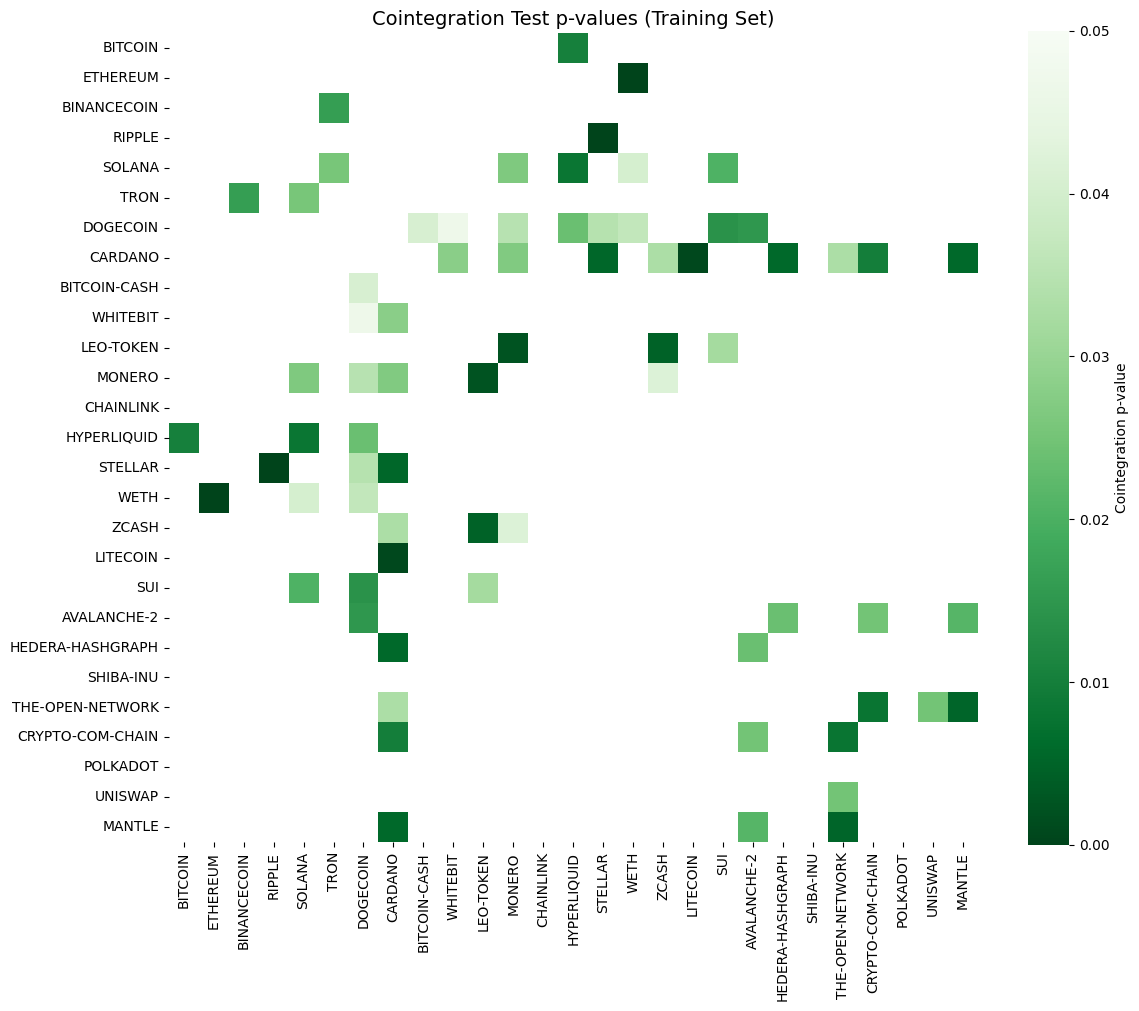

In [9]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    pval_matrix,
    cmap="Greens_r",   # darker = lower p-value
    vmin=0,
    vmax=0.05,
    square=True,
    cbar_kws={"label": "Cointegration p-value"}
)

plt.title(
    "Cointegration Test p-values (Training Set)",
    fontsize=14
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Hedge Ratio Estimation (OLS)

In [10]:
import statsmodels.api as sm

def estimate_hedge_ratio(y, x):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model.params[1]


# Spread Construction

In [11]:
def compute_spread(y, x, beta):
    return y - beta * x


# Moving Standard Score (Rolling Z-score)

In [12]:
def moving_standard_score(spread, t_long, t_short):
    long_mean = spread.rolling(t_long).mean()
    long_std = spread.rolling(t_long).std()

    z = (spread - long_mean) / long_std

    # short window smoothing
    z_smooth = z.rolling(t_short).mean()
    return z_smooth


# Trading Rule

In [13]:
def generate_positions(z, z_high, z_low):
    pos = np.zeros(len(z))

    for t in range(1, len(z)):
        if z.iloc[t] > z_high:
            pos[t] = -1
        elif z.iloc[t] < -z_high:
            pos[t] = 1
        elif abs(z.iloc[t]) < z_low:
            pos[t] = 0
        else:
            pos[t] = pos[t - 1]

    return pd.Series(pos, index=z.index)


# Strategy Returns

In [14]:
def compute_strategy_returns(spread, position):
    spread_ret = spread.diff()
    strat_ret = position.shift(1) * spread_ret
    return strat_ret.dropna()


# Sharpe Ratio

In [15]:
def sharpe_ratio(returns):
    return np.sqrt(252) * returns.mean() / returns.std()


# TRAINING 

In [16]:
def train_pair(pair, train_data, z_high, z_low, t_long, t_short):
    a, b = pair
    y = train_data[a]
    x = train_data[b]

    beta = estimate_hedge_ratio(y, x)
    spread = compute_spread(y, x, beta)

    z = moving_standard_score(spread, t_long, t_short)
    pos = generate_positions(z, z_high, z_low)
    returns = compute_strategy_returns(spread, pos)

    if len(returns) == 0 or returns.std() == 0:
        return None

    return {
        "asset_1": a,
        "asset_2": b,
        "beta": beta,
        "sharpe": sharpe_ratio(returns)
    }


In [17]:
# Baseline parameters used ONLY during training
Z_HIGH_TRAIN = 1.0
Z_LOW_TRAIN = 0.0
T_LONG_TRAIN = 60
T_SHORT_TRAIN = 1


In [18]:
train_results = []

for _, row in cointegrated_pairs.iterrows():
    res = train_pair(
        (row.asset_1, row.asset_2),
        train,
        z_high=Z_HIGH_TRAIN,
        z_low=Z_LOW_TRAIN,
        t_long=T_LONG_TRAIN,
        t_short=T_SHORT_TRAIN
    )

    if res is not None:
        train_results.append(res)

train_results = (
    pd.DataFrame(train_results)
    .sort_values("sharpe", ascending=False)
    .reset_index(drop=True)
)

train_results.head()


C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_728\2885805929.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]
C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_728\2885805929.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]
C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_728\2885805929.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]
C:\User

,asset_1,asset_2,beta,sharpe
0,SOLANA,SUI,34.002127,2.476084
1,ETHEREUM,WETH,1.000047,2.406863
2,CARDANO,LITECOIN,0.004471,2.149071
3,AVALANCHE-2,CRYPTO-COM-CHAIN,74.010390,2.116664
4,CARDANO,MANTLE,0.380860,2.076804


In [19]:
TOP_N = 5
top_pairs = train_results.head(TOP_N)
top_pairs


,asset_1,asset_2,beta,sharpe
0,SOLANA,SUI,34.002127,2.476084
1,ETHEREUM,WETH,1.000047,2.406863
2,CARDANO,LITECOIN,0.004471,2.149071
3,AVALANCHE-2,CRYPTO-COM-CHAIN,74.010390,2.116664
4,CARDANO,MANTLE,0.380860,2.076804


# Validation

In [20]:
z_high_vals = [1, 1.25, 1.5, 1.75]
z_low_vals = [0.25, 0.5, 0.75]
t_long_vals = [15, 30, 45, 60]
t_short_vals = [2, 3, 4, 5]


In [21]:
param_grid = {
    "z_high": [1, 1.25, 1.5, 1.75],
    "z_low": [0.25, 0.5, 0.75],
    "t_long": [15, 30, 45, 60],
    "t_short": [2, 3, 4, 5]
}


In [22]:
def evaluate_pair(
    pair_row,
    data,
    z_high,
    z_low,
    t_long,
    t_short
):
    a = pair_row.asset_1
    b = pair_row.asset_2
    beta = pair_row.beta

    y = data[a]
    x = data[b]
    spread = compute_spread(y, x, beta)

    z = moving_standard_score(spread, t_long, t_short)
    pos = generate_positions(z, z_high, z_low)
    returns = compute_strategy_returns(spread, pos)

    if len(returns) == 0 or returns.std() == 0:
        return np.nan

    return sharpe_ratio(returns)


In [23]:
def validate_pair_with_baseline(pair_row, val_data, param_grid):
    a = pair_row.asset_1
    b = pair_row.asset_2
    beta = pair_row.beta

    # ---------- Baseline Sharpe on validation ----------
    baseline_val_sharpe = evaluate_pair(
        pair_row,
        val_data,
        z_high=Z_HIGH_TRAIN,
        z_low=Z_LOW_TRAIN,
        t_long=T_LONG_TRAIN,
        t_short=T_SHORT_TRAIN
    )

    y = val_data[a]
    x = val_data[b]
    spread = compute_spread(y, x, beta)

    best_result = None

    for z_high in param_grid["z_high"]:
        for z_low in param_grid["z_low"]:
            for t_long in param_grid["t_long"]:
                for t_short in param_grid["t_short"]:

                    if t_short >= t_long:
                        continue

                    z = moving_standard_score(spread, t_long, t_short)
                    pos = generate_positions(z, z_high, z_low)
                    returns = compute_strategy_returns(spread, pos)

                    if len(returns) == 0 or returns.std() == 0:
                        continue

                    sharpe = sharpe_ratio(returns)

                    if (
                        best_result is None
                        or sharpe > best_result["val_sharpe"]
                    ):
                        best_result = {
                            "asset_1": a,
                            "asset_2": b,
                            "beta": beta,
                            "z_high": z_high,
                            "z_low": z_low,
                            "t_long": t_long,
                            "t_short": t_short,
                            "baseline_val_sharpe": baseline_val_sharpe,
                            "val_sharpe": sharpe,
                            "delta_sharpe": sharpe - baseline_val_sharpe
                        }

    return best_result


In [24]:
val_results = []

for _, pair_row in top_pairs.iterrows():
    res = validate_pair_with_baseline(pair_row, valid, param_grid)
    if res is not None:
        val_results.append(res)

val_results = (
    pd.DataFrame(val_results)
    .sort_values("val_sharpe", ascending=False)
    .reset_index(drop=True)
)

val_results


,asset_1,asset_2,beta,z_high,z_low,t_long,t_short,baseline_val_sharpe,val_sharpe,delta_sharpe
0,SOLANA,SUI,34.002127,1.00,0.25,30,2,NaN,3.944735,NaN
1,ETHEREUM,WETH,1.000047,1.00,0.75,30,2,NaN,3.695651,NaN
2,CARDANO,LITECOIN,0.004471,1.25,0.75,15,5,-1.758745,2.320686,4.079430
3,CARDANO,MANTLE,0.380860,1.00,0.50,45,4,1.750786,1.771584,0.020798
4,AVALANCHE-2,CRYPTO-COM-CHAIN,74.010390,1.25,0.25,30,4,NaN,1.542962,NaN


# Test

In [25]:
def test_pair(pair_row, test_data):
    a = pair_row.asset_1
    b = pair_row.asset_2
    beta = pair_row.beta

    z_high = pair_row.z_high
    z_low = pair_row.z_low
    t_long = pair_row.t_long
    t_short = pair_row.t_short

    y = test_data[a]
    x = test_data[b]

    spread = compute_spread(y, x, beta)
    z = moving_standard_score(spread, t_long, t_short)
    pos = generate_positions(z, z_high, z_low)
    returns = compute_strategy_returns(spread, pos)

    if len(returns) == 0 or returns.std() == 0:
        return None

    return {
        "asset_1": a,
        "asset_2": b,
        "test_sharpe": sharpe_ratio(returns),
        "test_mean_return": returns.mean(),
        "test_vol": returns.std()
    }


In [26]:
test_results = []

for _, row in val_results.iterrows():
    res = test_pair(row, test)
    if res is not None:
        test_results.append(res)

test_results = (
    pd.DataFrame(test_results)
    .sort_values("test_sharpe", ascending=False)
    .reset_index(drop=True)
)

test_results


,asset_1,asset_2,test_sharpe,test_mean_return,test_vol
0,ETHEREUM,WETH,3.912863,0.218301,0.885648
1,CARDANO,MANTLE,3.207673,0.001270,0.006286
2,CARDANO,LITECOIN,1.150082,0.000480,0.006632
3,AVALANCHE-2,CRYPTO-COM-CHAIN,1.101769,0.018265,0.263169
4,SOLANA,SUI,0.364625,0.029568,1.287285


In [27]:
final_results = val_results.merge(
    test_results,
    on=["asset_1", "asset_2"],
    how="inner"
)

final_results["sharpe_drop"] = (
    final_results.val_sharpe - final_results.test_sharpe
)

final_results[
    ["asset_1", "asset_2", "val_sharpe", "test_sharpe", "sharpe_drop"]
]


,asset_1,asset_2,val_sharpe,test_sharpe,sharpe_drop
0,SOLANA,SUI,3.944735,0.364625,3.580111
1,ETHEREUM,WETH,3.695651,3.912863,-0.217212
2,CARDANO,LITECOIN,2.320686,1.150082,1.170604
3,CARDANO,MANTLE,1.771584,3.207673,-1.436089
4,AVALANCHE-2,CRYPTO-COM-CHAIN,1.542962,1.101769,0.441193


# Buy&Hold

In [28]:
def buy_and_hold_pair_returns(y, x, beta):
    spread = y - beta * x
    return spread.diff().dropna()


In [29]:
def benchmark_pair_metrics(y, x, beta):
    bh_returns = buy_and_hold_pair_returns(y, x, beta)

    if len(bh_returns) == 0 or bh_returns.std() == 0:
        return None

    return {
        "bh_pair_mean": bh_returns.mean(),
        "bh_pair_vol": bh_returns.std(),
        "bh_pair_sharpe": np.sqrt(252) * bh_returns.mean() / bh_returns.std()
    }


In [30]:
def test_pair_with_benchmark(pair_row, test_data):
    a = pair_row.asset_1
    b = pair_row.asset_2
    beta = pair_row.beta

    # ---- Strategy ----
    spread = compute_spread(test_data[a], test_data[b], beta)
    z = moving_standard_score(
        spread,
        pair_row.t_long,
        pair_row.t_short
    )
    pos = generate_positions(z, pair_row.z_high, pair_row.z_low)
    strat_returns = compute_strategy_returns(spread, pos)

    if len(strat_returns) == 0 or strat_returns.std() == 0:
        return None

    strat_mean = strat_returns.mean()
    strat_vol = strat_returns.std()
    strat_sharpe = sharpe_ratio(strat_returns)

    # ---- Buy & Hold benchmark (PAIR) ----
    bh = benchmark_pair_metrics(
        test_data[a],
        test_data[b],
        beta
    )

    if bh is None:
        return None

    return {
    "asset_1": a,
    "asset_2": b,

    "strategy_mean": strat_mean,
    "strategy_vol": strat_vol,
    "strategy_sharpe": strat_sharpe,

    "bh_pair_mean": bh["bh_pair_mean"],
    "bh_pair_vol": bh["bh_pair_vol"],
    "bh_pair_sharpe": bh["bh_pair_sharpe"],

    "sharpe_diff": strat_sharpe - bh["bh_pair_sharpe"]
    }


In [31]:
benchmark_results = []

for _, row in val_results.iterrows():
    res = test_pair_with_benchmark(row, test)
    if res is not None:
        benchmark_results.append(res)

benchmark_results = pd.DataFrame(benchmark_results)
benchmark_results


,asset_1,asset_2,strategy_mean,strategy_vol,strategy_sharpe,bh_pair_mean,bh_pair_vol,bh_pair_sharpe,sharpe_diff
0,SOLANA,SUI,0.029568,1.287285,0.364625,-0.401406,2.974583,-2.142190,2.506815
1,ETHEREUM,WETH,0.218301,0.885648,3.912863,0.013499,6.034974,0.035509,3.877354
2,CARDANO,LITECOIN,0.000480,0.006632,1.150082,-0.001757,0.011480,-2.429342,3.579424
3,CARDANO,MANTLE,0.001270,0.006286,3.207673,-0.000248,0.016141,-0.243864,3.451536
4,AVALANCHE-2,CRYPTO-COM-CHAIN,0.018265,0.263169,1.101769,-0.046900,0.422390,-1.762634,2.864404


In [32]:
benchmark_results["strategy_sharpe_annual"] = (
    benchmark_results["strategy_sharpe"] * np.sqrt(252)
)

benchmark_results["bh_pair_sharpe_annual"] = (
    benchmark_results["bh_pair_sharpe"] * np.sqrt(252)
)

benchmark_results["sharpe_diff_annual"] = (
    benchmark_results["strategy_sharpe_annual"]
    - benchmark_results["bh_pair_sharpe_annual"]
)

benchmark_results


,asset_1,asset_2,strategy_mean,strategy_vol,strategy_sharpe,bh_pair_mean,bh_pair_vol,bh_pair_sharpe,sharpe_diff,strategy_sharpe_annual,bh_pair_sharpe_annual,sharpe_diff_annual
0,SOLANA,SUI,0.029568,1.287285,0.364625,-0.401406,2.974583,-2.142190,2.506815,5.788237,-34.006213,39.794450
1,ETHEREUM,WETH,0.218301,0.885648,3.912863,0.013499,6.034974,0.035509,3.877354,62.114775,0.563686,61.551090
2,CARDANO,LITECOIN,0.000480,0.006632,1.150082,-0.001757,0.011480,-2.429342,3.579424,18.256986,-38.564613,56.821599
3,CARDANO,MANTLE,0.001270,0.006286,3.207673,-0.000248,0.016141,-0.243864,3.451536,50.920224,-3.871219,54.791443
4,AVALANCHE-2,CRYPTO-COM-CHAIN,0.018265,0.263169,1.101769,-0.046900,0.422390,-1.762634,2.864404,17.490046,-27.980954,45.471000


# Plot distribution

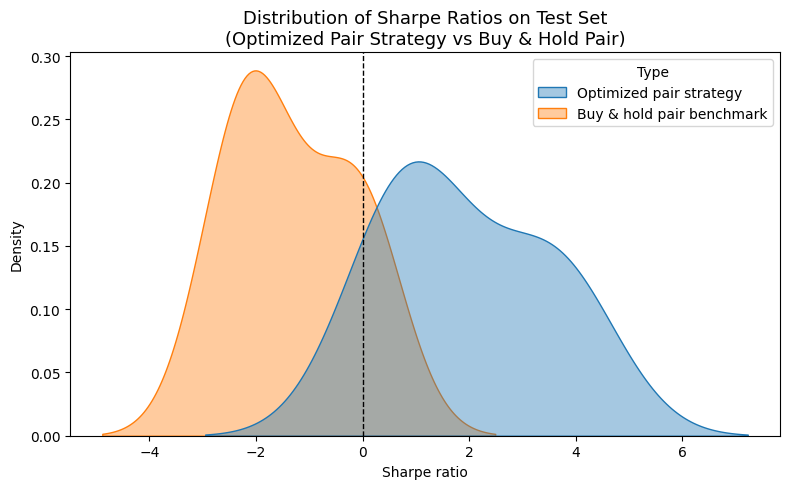

In [33]:
plot_df = pd.DataFrame({
    "Sharpe ratio": pd.concat([
        benchmark_results["strategy_sharpe"],
        benchmark_results["bh_pair_sharpe"]
    ], ignore_index=True),
    "Type": (
        ["Optimized pair strategy"] * len(benchmark_results) +
        ["Buy & hold pair benchmark"] * len(benchmark_results)
    )
})

plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=plot_df,
    x="Sharpe ratio",
    hue="Type",
    fill=True,
    alpha=0.4,
    common_norm=False
)

plt.axvline(0, color="black", linestyle="--", linewidth=1)

plt.title(
    "Distribution of Sharpe Ratios on Test Set\n(Optimized Pair Strategy vs Buy & Hold Pair)",
    fontsize=13
)
plt.xlabel("Sharpe ratio")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


# Plot spread for the best SR pair 

In [34]:
pair = val_results.iloc[0]   # best validated pair
a = pair.asset_1
b = pair.asset_2
beta = pair.beta

z_high = pair.z_high
z_low = pair.z_low
t_long = pair.t_long
t_short = pair.t_short

data = train   # choose train / valid / test


In [35]:
y = data[a]
x = data[b]

spread = compute_spread(y, x, beta)
z = moving_standard_score(spread, t_long, t_short)
pos = generate_positions(z, z_high, z_low)


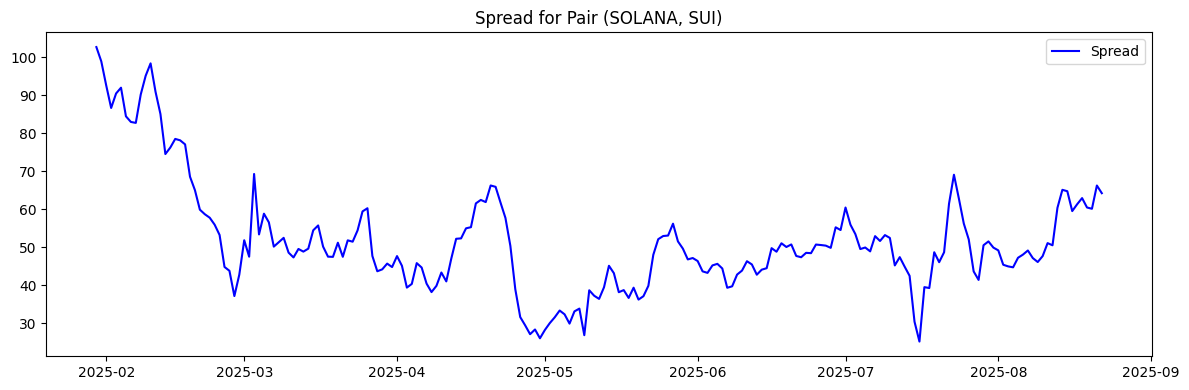

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(spread, label="Spread", color="blue")

plt.title(f"Spread for Pair ({a}, {b})")
plt.legend()
plt.tight_layout()
plt.show()


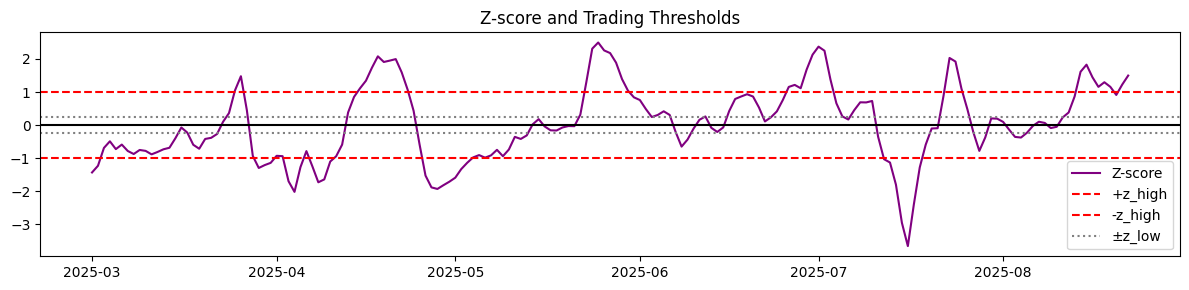

In [38]:
plt.figure(figsize=(12, 3))
plt.plot(z, label="Z-score", color="purple")

plt.axhline(z_high, linestyle="--", color="red", label="+z_high")
plt.axhline(-z_high, linestyle="--", color="red", label="-z_high")
plt.axhline(z_low, linestyle=":", color="gray", label="±z_low")
plt.axhline(-z_low, linestyle=":", color="gray")

plt.axhline(0, color="black")

plt.title("Z-score and Trading Thresholds")
plt.legend()
plt.tight_layout()
plt.show()
